In [1]:
import pm4py
import pandas as pd

print("Reading event log...")
billing_df = pm4py.read.read_xes("./data/hospital_billing/Hospital Billing - Event Log.xes.gz")

#incident_df = pm4py.read.read_xes("./data/volvo_it_incident/BPI_Challenge_2013_incidents.xes")

#filtered_log = pm4py.filter_variants_top_k(incident_df, 5)


Reading event log...


c:\Users\eminb\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 100000/100000 [00:19<00:00, 5135.52it/s]


In [8]:
pd.set_option('display.max_columns', None)
#billing_df
incident_df

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp,case:concept:name
0,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 16:59:42+00:00,1-364285768
1,V30,France,fr,Frederic,Org line A2,A2_4,Accepted,Medium,PROD582,In Progress,2010-03-31 17:00:56+00:00,1-364285768
2,V5 3rd,France,fr,Frederic,Org line A2,A2_5,Queued,Medium,PROD582,Awaiting Assignment,2010-03-31 17:45:48+00:00,1-364285768
3,V5 3rd,France,fr,Anne Claire,Org line A2,A2_5,Accepted,Medium,PROD582,In Progress,2010-04-06 16:44:07+00:00,1-364285768
4,V30,France,fr,Anne Claire,Org line A2,A2_4,Queued,Medium,PROD582,Awaiting Assignment,2010-04-06 16:44:38+00:00,1-364285768
...,...,...,...,...,...,...,...,...,...,...,...,...
65528,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Low,PROD424,In Call,2012-05-05 04:07:43+00:00,1-740866691
65529,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 06:58:40+00:00,1-740866708
65530,C9,Brazil,br,Lierson,Org line C,V3_2,Accepted,Medium,PROD562,In Progress,2012-05-05 07:02:39+00:00,1-740866708
65531,C9,Brazil,br,Lierson,Org line C,V3_2,Completed,Medium,PROD562,In Call,2012-05-05 07:23:03+00:00,1-740866708


Discovering processes...


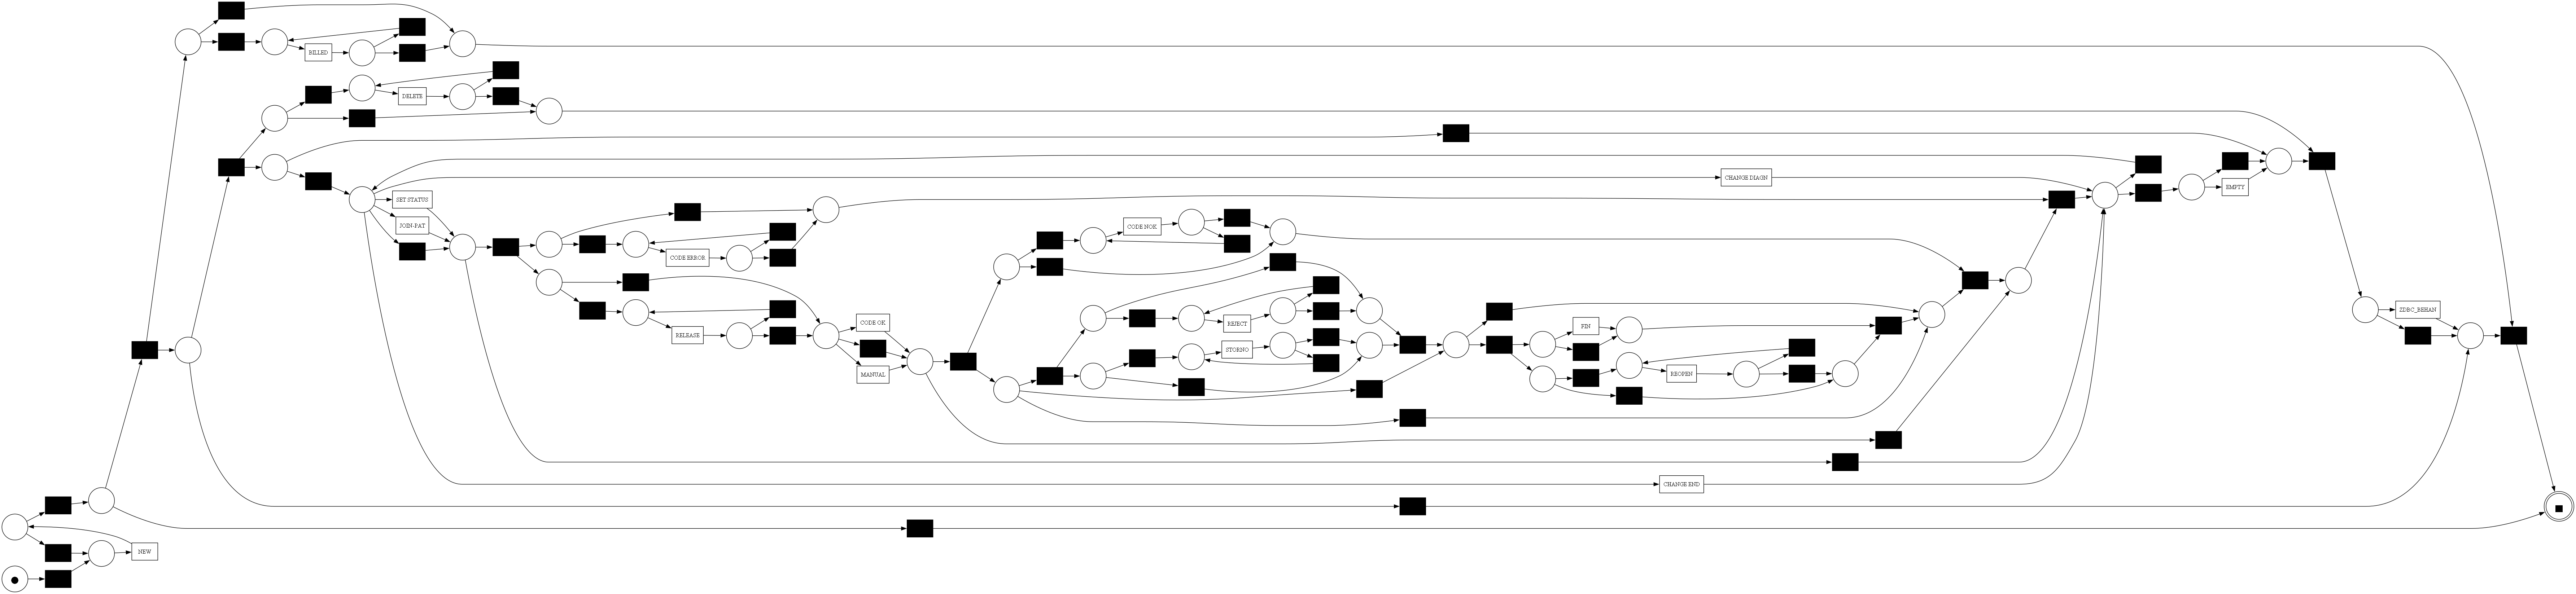

Done


In [3]:
print("Discovering processes...")
billing_petri_net, im, fm = pm4py.discovery.discover_petri_net_inductive(billing_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
#tree = pm4py.discover_process_tree_inductive(incident_df)
#dfg, start_act, end_act = pm4py.discover_dfg(incident_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
#dfg_typed, start_act, end_act = pm4py.discover_performance_dfg(incident_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
#bpmn = pm4py.discover_bpmn_inductive(incident_df, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

#print(billing_dfg)
#print("Viewing ...")
pm4py.vis.view_petri_net(billing_petri_net, im, fm, format='png')
#pm4py.view_process_tree(tree, format='html')
#pm4py.view_dfg(dfg, start_act, end_act, format='html')
#pm4py.view_dfg(dfg_typed, start_act, end_act, format='html')
#pm4py.view_bpmn(bpmn, format='html')
print("Done")

In [2]:
import json
from pm4py.visualization.footprints import visualizer as fp_visualizer
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.algo.discovery.log_skeleton import algorithm as lsk_discovery
from pm4py.algo.conformance.log_skeleton import algorithm as lsk_conformance
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery
from pm4py.algo.conformance.temporal_profile import algorithm as temporal_profile_conformance

# Token based replay
#net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(billing_df)
#replayed_traces = pm4py.conformance_diagnostics_token_based_replay(billing_df, net, initial_marking, final_marking)
#replayed_traces

# Alignments
#net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(billing_df)
#aligned_traces = pm4py.conformance_diagnostics_alignments(billing_df, net, initial_marking, final_marking)

# Footprints
#net, im, fm = pm4py.discover_petri_net_inductive(billing_df)
#fp_net = footprints_discovery.apply(net, im, fm)
#gviz = fp_visualizer.apply(fp_net, parameters={fp_visualizer.Variants.SINGLE.value.Parameters.FORMAT: "png"})
#fp_visualizer.view(gviz)

# Log skeleton
skeleton = lsk_discovery.apply(billing_df, parameters={lsk_discovery.Variants.CLASSIC.value.Parameters.NOISE_THRESHOLD: 0.0})
conf_result = lsk_conformance.apply(billing_df, skeleton)

# Temproal profile
#temporal_profile = temporal_profile_discovery.apply(billing_df)
#results = temporal_profile_conformance.apply(billing_df, temporal_profile)

#aligned_traces
result_file = open("./replay_result.json", "w")
result_file.write(str(conf_result))
result_file.close()